<a href="https://colab.research.google.com/github/EvertonAvelino/IA/blob/master/trabalho_final_fdv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def plot_digit(image):
    plt.imshow(image, cmap='gray')
    plt.show()

In [0]:
class RegressaoLinear:
    
    def __init__(self, x_treinamento, y_treinamento, x_teste, y_teste):
        
        self._x_treinamento = x_treinamento
        self._y_treinamento = y_treinamento
        self._x_teste = x_teste
        self._y_teste = y_teste
        self._m = x_treinamento.shape[1] #shape[0] sao as linhas, shape[1] sao as colunas
        self._alpha = 0.01
        
        # matrizes
        self._W = np.random.randn(10,784) * 0.01 #multiplica num entre 0 e 1 por 0.01 para serem pequenos, dentro da sigmoid
        self._B = np.zeros((10,1))
        self._Y = np.zeros((10,m))
        
        print(labels.shape)
        # index recebe o contador da itereacao, value recebe o valor do label (de 0 a 9)
        for index, value in enumerate(labels):
            self._Y[value][index] = 1 # coloca 1 no valor do label correspondente àquele exemplo, o restante 0
        print(self._Y.shape) 
    
    def h_teta(self, X):
        return self._W.dot(X) + self._B 
    
    
    def retorna_pesos_do_digito(self, digito):
        return self._W[digito, :]
    
    
    def treinamento(self, iteracoes):
        
        lista_treinamento_classificados_corretamente = []
        lista_teste_classificados_corretamente = []
        
        for i in range(iteracoes):
            
            A = self.h_teta(self._x_treinamento)
            E = (A - self._Y)
            self._W = self._W - self._alpha * (np.dot(E, self._x_treinamento.T) / self._m)
            self._B = self._B - self._alpha * (np.sum(E, axis=1, keepdims=True) / self._m)
            
            if i % 100 == 0:
                classificados_corretamente = np.sum(np.argmax(A, axis=0) == np.argmax(self._Y, axis=0))
                lista_treinamento_classificados_corretamente.append((classificados_corretamente / self._m) * 100)
                
                Y_hat_teste = self.h_teta(images_teste)
                teste_corretos = np.count_nonzero(np.argmax(Y_hat_teste, axis=0) == self._y_teste)
                lista_teste_classificados_corretamente.append((teste_corretos)/len(self._y_teste) * 100)
                
                print('Linear -> classificados corretamente (treino): ', classificados_corretamente)
                print('Linear -> classificados corretamente (teste): ', teste_corretos)
        return lista_treinamento_classificados_corretamente, lista_teste_classificados_corretamente 

Na regressão logística abaixo você deve completar a função que retorna o valor da derivada da sigmoid e tamb;em o cálculo para atualizar os valores de w e b. Não é muito diferente do cálculo da regressão linear, apenas alguns passos a mais

In [0]:
class LogisticRegression:
    
    def __init__(self, x_train, y_train, x_test, y_test):

        self._x_train = x_train
        self._y_train = y_train
        self._x_test = x_test
        self._y_test = y_test
        self._m = x_train.shape[1]
        
        self._W = np.random.randn(10, 784) * 0.01
        self._B = np.zeros((10, 1))
        self._Y = np.zeros((10, m))
        self._alpha = 0.1

        for index, value in enumerate(labels):
            self._Y[value][index] = 1
            
    def sigmoid(self, Z):
        return 1/(1 + np.exp(-Z))

    def derivada_sigmoid(self, A):
        return A * (1 - A)

    def h_theta(self, X):
        Z = self._W.dot(X) + self._B
        return Z
    
    def g_h_teta(self, Z):
        return self.sigmoid(Z)
    
    def retorna_pesos_do_digito(self, digit):
        return self._W[digit, :]
    

    def treinamento(self, iterations):
        classified_correctly_train_list = []
        classified_correctly_test_list = []
        
        for i in range(iterations):

            Z = self.h_theta(self._x_train)
            A = self.g_h_teta(Z)
            dA = self.derivada_sigmoid(A)
            E = (A - self._Y)
            self._W = self._W - self._alpha * (np.dot(np.multiply(E, dA), self._x_train.T)) / m
            self._B = self._B - self._alpha * (np.sum(np.multiply(E, dA), axis=1, keepdims=True)) / m
            
            if i % 100 == 0:
                classified_correctly = np.sum(np.argmax(A, axis=0) == np.argmax(self._Y, axis=0))
                classified_correctly_train_list.append((classified_correctly / m) * 100)
                
                Y_hat_teste = self.h_theta(images_teste)
                teste_corretos = np.count_nonzero(np.argmax(Y_hat_teste, axis=0) == self._y_test)
                classified_correctly_test_list.append((teste_corretos)/len(self._y_test) * 100)
                
                print('Logística -> classificados corretamente (treino): ', classified_correctly)
                print('Logística -> classificados corretamente (teste): ', teste_corretos)
        return classified_correctly_train_list, classified_correctly_test_list   

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

m = 60000       # numero de imagens a serem treinadas

images, labels = (x_train[0:m].reshape(m, 28*28) / 255, y_train[0:m])
images = images.T

images_teste = x_test.reshape(x_test.shape[0], 28*28) / 255
images_teste = images_teste.T

lin_reg = RegressaoLinear(images, labels, images_teste, y_test)
log_reg = LogisticRegression(images, labels, images_teste, y_test)


print('REGRESSÃO LINEAR...')
percentage_lin_reg_train, percentage_lin_reg_test = lin_reg.treinamento(1000)
print('')

print('REGRESSÃO LOGÍSTICA...')
percentage_log_reg_train, percentage_log_reg_test = log_reg.treinamento(1000)



(60000,)
(10, 60000)
REGRESSÃO LINEAR...
Linear -> classificados corretamente (treino):  5916
Linear -> classificados corretamente (teste):  1246
Linear -> classificados corretamente (treino):  47761
Linear -> classificados corretamente (teste):  8018
Linear -> classificados corretamente (treino):  49433
Linear -> classificados corretamente (teste):  8324
Linear -> classificados corretamente (treino):  50037
Linear -> classificados corretamente (teste):  8420


In [58]:
print("img teste y_test: ", y_test.shape[0])
print("img teste x_test: ", x_test.shape[0])

img teste y_test:  10000
img teste x_test:  10000


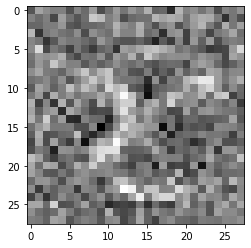

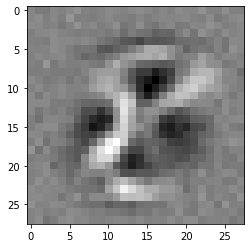

In [56]:
plot_digit(lin_reg.retorna_pesos_do_digito(8).reshape(28, 28))
plot_digit(log_reg.retorna_pesos_do_digito(8).reshape(28, 28))

O trecho de código abaixo irá plotar as porcentagens de instâncias classificadas corretamente no **conjunto de treino** ao longo do processo de treinamento dos modelos.

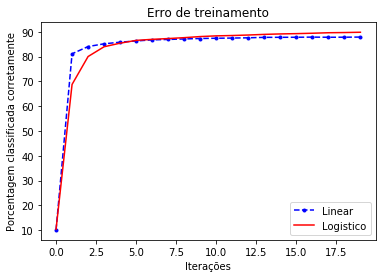

In [0]:
plt.xlabel('Iterações')
plt.ylabel('Porcentagem classificada corretamente')
plt.title('Erro de treinamento')
plt.plot(percentage_lin_reg_train, 'b--.', label='Linear')
plt.plot(percentage_log_reg_train, 'r-', label='Logistico')
plt.legend(loc='best')

O trecho de código abaixo irá plotar as porcentagens de instâncias classificadas corretamente no **conjunto de teste** ao longo do processo de treinamento dos modelos.

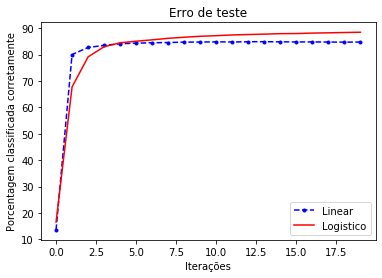

In [0]:
plt.xlabel('Iterações')
plt.ylabel('Porcentagem classificada corretamente')
plt.title('Erro de teste')
plt.plot(percentage_lin_reg_test, 'b--.', label='Linear')
plt.plot(percentage_log_reg_test, 'r-', label='Logistico')
plt.legend(loc='best')